In [1]:
import numpy as np               # used for matrix multiplication ,matrix transpose,matrix-addition
import pandas as pd              # used for handelling data ,for caluculation of mean,std
import matplotlib.pyplot as plt  # used for visualization of data 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns            # used for better visualization
sns.set()

from scipy.stats import norm     # for normal distribution ploting only.all values are caluculated using pandas dataframe only

In [2]:
def solve(m1,m2,std1,std2):
    # given inputs are mean and standard deviation of both the normal distribution 
    # function for finding roots of equations for normal distribution
    # this method is directly  taken from internet(stack overflow)
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    d = np.roots([a,b,c])
    r=0
    for x in d:
        if m2<x and x<m1:
            r=x
    return r

In [3]:
def quality(r,w,data):
    #for testing data
    # given inputs are discriminating value,projection line vector,test data  
    #data=data.reset_index()
    Aclass=data["C"].tolist()                    #actual class data for final verification
    tdata =data.drop(columns=[ 'C'])             #data manuplation for projecting those values on to the give vector
    #print(tdata)                                
    aftestdata=np.dot(w,np.transpose(tdata))     #data after projection   
    a=[0 if x<r else 1 for x in aftestdata]      #our classification into classes
    
    cor=0                                        # manging count of correct classifications
    tp=0
    fp=0
    fn=0
    tn=0
    for i in range(len(a)):
        if Aclass[i]==a[i]:
            cor=cor+1
    for i in range(len(a)):
        if Aclass[i]==1 and a[i]==1:
            tp=tp+1
        if Aclass[i]==0 and a[i]==1:
            fp=fp+1
        if Aclass[i]==1 and a[i]==0:
            fn=fn+1
        if Aclass[i]==0 and a[i]==0:
            tn=tn+1
            
    prec=tp/(tp+fp)
    recall=tp/(tp+fn)
    fscore=2*((prec*recall)/(prec+recall))
    
    return (cor/len(a))*100,fscore                     # returning %  of data classified correct and f score 

In [4]:
def viz3d(data):
    x=data["X"]
    y=data["Y"]
    z=data["Z"]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z,c=data["C"],cmap="RdYlGn_r")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(-10,10)
    ax.set_ylim(-3,3)
    ax.set_zlim(-2,2)

    plt.show()

In [5]:
def viz2d(data):
    #print("2d")
    y=data["B"]
    x=data["A"]
    #train data visualization
    plt.scatter(x,y,c=data["C"],cmap="RdYlGn_r",)
    plt.xlabel("A",fontsize="20")
    plt.ylabel("B",fontsize="20")
    plt.show()

In [6]:
def LDA(train):
    
    grouped = train.groupby(train.C)
    d1= grouped.get_group(1)
    d1=d1.drop(columns=[ 'C'])
    d2=grouped.get_group(0)
    d2=d2.drop(columns=[ 'C'])
    
    
    s1=np.dot(np.transpose(d1-d1.mean()),d1-d1.mean())  #scatter matrix 1
    print("scatter matrix1:",s1) 
    
    s2=np.dot(np.transpose(d2-d2.mean()),d2-d2.mean())  #scatter matrix2
    print("scatter matrix2:",s2)
    
    sw=np.add(s1,s2)                                   #scatter (1+2) 
    print("sw=s1+s2=>",sw)
    
    swinv=np.linalg.inv(sw)                        #inverse of the sw using linear algebra methods 
    print(swinv)
    
    w=np.dot(swinv,d1.mean()-d2.mean())           
    print("W vector",w)
    
    projc1=np.dot(w,np.transpose(d1))   #projection of class 1
    projc0=np.dot(w,np.transpose(d2))   #projection of class 0
    
    #ploting the projected points
    plt.figure(1)
    yp=0*projc1
    plt.scatter(projc1,yp,c='r',label="class 1")
    yp=0*projc0
    plt.scatter(projc0,yp,c='g',label="class 0")
    plt.xlim(-0.075, 0.075)
    plt.ylim(-0.1,0.1)
    
    # caluculation of mean and standard deviation for each class seperately
    m1=projc1.mean()
    sig1=projc1.std()

    m2=projc0.mean()
    sig2=projc0.std()
    print("m1 after projection:",m1)
    print("m2 after projection:",m2)
    print("sig1 after projection:",sig1)
    print("sig2 after projection:",sig2)
    
    x_all = np.arange(-0.05, 0.05, 0.001)
    y1=norm.pdf(x_all,m1,sig1)
    y0=norm.pdf(x_all,m2,sig2)
    
    plt.figure(2)
    plt.plot(x_all,y1,c='r',label="class 1")
    plt.hist(projc1,bins=25,color="#FF8989")
    plt.plot(x_all,y0,c='g',label="class 0")
    plt.hist(projc0,bins=12,color="#7FFF7F")
    plt.xlabel("projection line",fontsize="10")
    plt.ylabel("density of points",fontsize="10")
    plt.xlim(-0.075, 0.075)
    plt.ylim(0,125)
    plt.legend()
    plt.show()
    
    
    result = solve(m1,m2,sig1,sig2) #value which seperates both the classes
    print("deterministic value :",result)    
     
    return w,result
    


In [7]:
#data input
data=pd.read_csv(input())                

a1_d2.csv


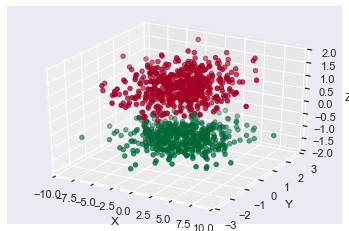

 DATA


In [8]:
#train data and test data visualization
k=len(data.columns)
if k==4:
    viz3d(data)
    print(" DATA")
    
else:
    viz2d(data)
    print("data")


scatter matrix1: [[4213.75649592    4.75321826   62.90465755]
 [   4.75321826  495.31648963   13.43656478]
 [  62.90465755   13.43656478   76.97468242]]
scatter matrix2: [[ 4.84762093e+03 -1.03353986e+02  5.91405263e-02]
 [-1.03353986e+02  4.90885070e+02 -5.47697620e-01]
 [ 5.91405263e-02 -5.47697620e-01  1.27090501e+01]]
sw=s1+s2=> [[9061.37742888  -98.60076737   62.96379808]
 [ -98.60076737  986.20155992   12.88886716]
 [  62.96379808   12.88886716   89.68373253]]
[[ 1.11044484e-04  1.21439550e-05 -7.97056953e-05]
 [ 1.21439550e-05  1.01722768e-03 -1.54716374e-04]
 [-7.97056953e-05 -1.54716374e-04  1.12284878e-02]]
W vector [-0.00014845 -0.0004129   0.02263587]
m1 after projection: 0.022834181350647846
m2 after projection: -0.02280985897080428
sig1 after projection: 0.008825469869510952
sig2 after projection: 0.003660486610446563


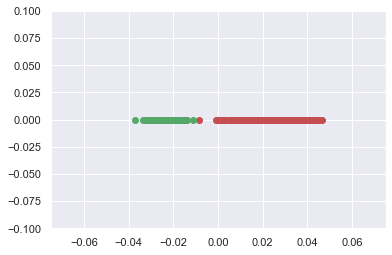

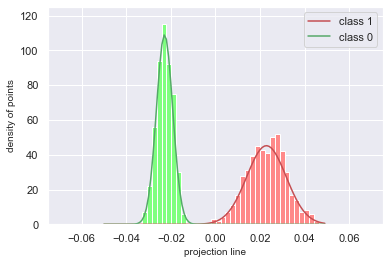

deterministic value : -0.00881386312946787


In [9]:
p,s=LDA(data)
#print(p,s)

In [10]:
acc,fsc=quality(s,p,data)
print("accuracy:",acc)
print("F score:",fsc)

accuracy: 100.0
F score: 1.0
